Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Todas las librerías están instaladas correctamente.")

Todas las librerías están instaladas correctamente.


In [4]:
# Configurar gráficos de seaborn
sns.set(style="whitegrid")

In [5]:
# Cargar el dataset
ruta_archivo = r"C:\Users\crist\Desktop\Titanic-Dataset.csv"
df = pd.read_csv(ruta_archivo)
print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [6]:
# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Verificar información general del dataset
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
display(df.describe(include="all"))


Estadísticas descriptivas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [10]:
# Imputar valores faltantes en 'Age' con la media
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Tratar 'Cabin' como binario: 1 si tiene un valor, 0 si está vacío
df['Cabin'] = df['Cabin'].notnull().astype(int)

# Imputar valores faltantes en 'Embarked' con la moda
moda_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_embarked)

# Verificar si hay valores faltantes después del tratamiento
print("\nValores faltantes después del tratamiento:")
print(df.isnull().sum())


Valores faltantes después del tratamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


Correlación entre variables numéricas y Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


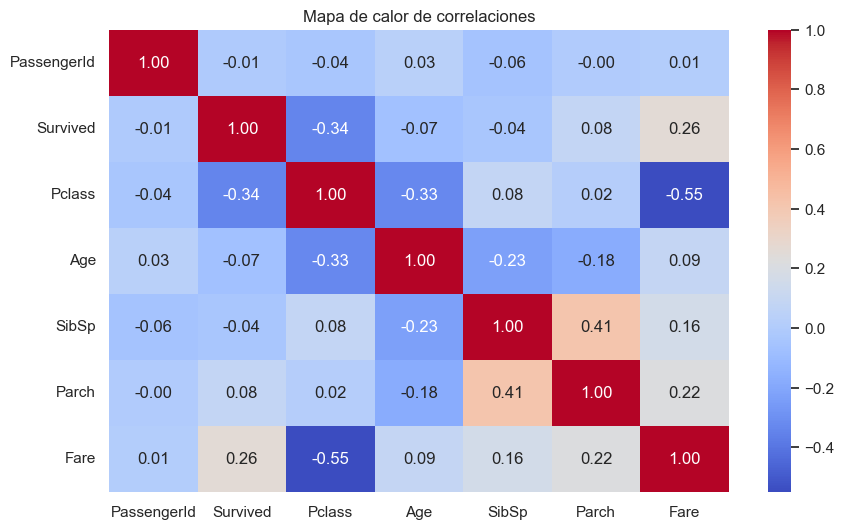

In [11]:
# 1. Correlación entre variables numéricas y Survived
print("\nCorrelación entre variables numéricas y Survived:")
# Seleccionar solo columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])
correlaciones = numericas.corr()
print(correlaciones['Survived'].sort_values(ascending=False))

# Visualizar un mapa de calor de las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


Distribución de supervivencia por sexo:
Survived    0    1
Sex               
female     81  233
male      468  109


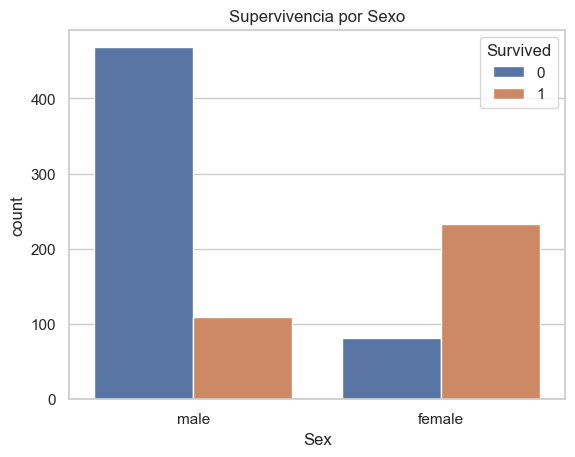

In [12]:
# Análisis de la variable 'Sex'
import seaborn as sns
import matplotlib.pyplot as plt

# Tabla de contingencia entre 'Survived' y 'Sex'
print("\nDistribución de supervivencia por sexo:")
print(pd.crosstab(df['Sex'], df['Survived']))

# Gráfico de barras para 'Sex' vs 'Survived'
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Supervivencia por Sexo')
plt.show()

Codificar las variables

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Codificar las variables categóricas
label_encoder = LabelEncoder()

# Codificar la columna 'Sex'
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Codificar la columna 'Embarked', rellena valores nulos si es necesario
df['Embarked'] = label_encoder.fit_transform(df['Embarked'].fillna('S'))

# Selección de las características y la variable objetivo
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Excluimos las columnas no relevantes
y = df['Survived']

Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [14]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenar el modelo configurando los diferentes hiperparámetros

In [15]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialización del modelo de Regresión Logística
modelo = LogisticRegression(max_iter=500)

# Entrenamiento del modelo con las características escaladas
modelo.fit(X_train_scaled, y_train)

# Evaluación del modelo en el conjunto de prueba
score = modelo.score(X_test_scaled, y_test)
print(f'Precisión del modelo: {score:.2f}')


Precisión del modelo: 0.81


Evaluar desempeño

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones del modelo
y_pred = modelo.predict(X_test_scaled)

# Imprimir el reporte de clasificación (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Matriz de confusión:
[[90 15]
 [19 55]]


Gráficas

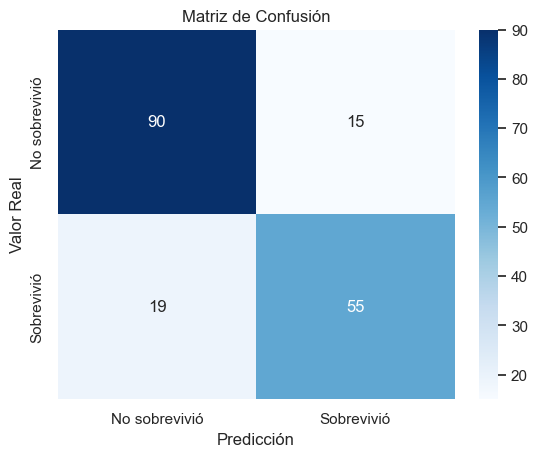

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()